In [5]:
import scipy.io
mat = scipy.io.loadmat(r'C:\Users\79365\Desktop\图像-叶绿素\叶绿素\matlab数据\day2.mat')


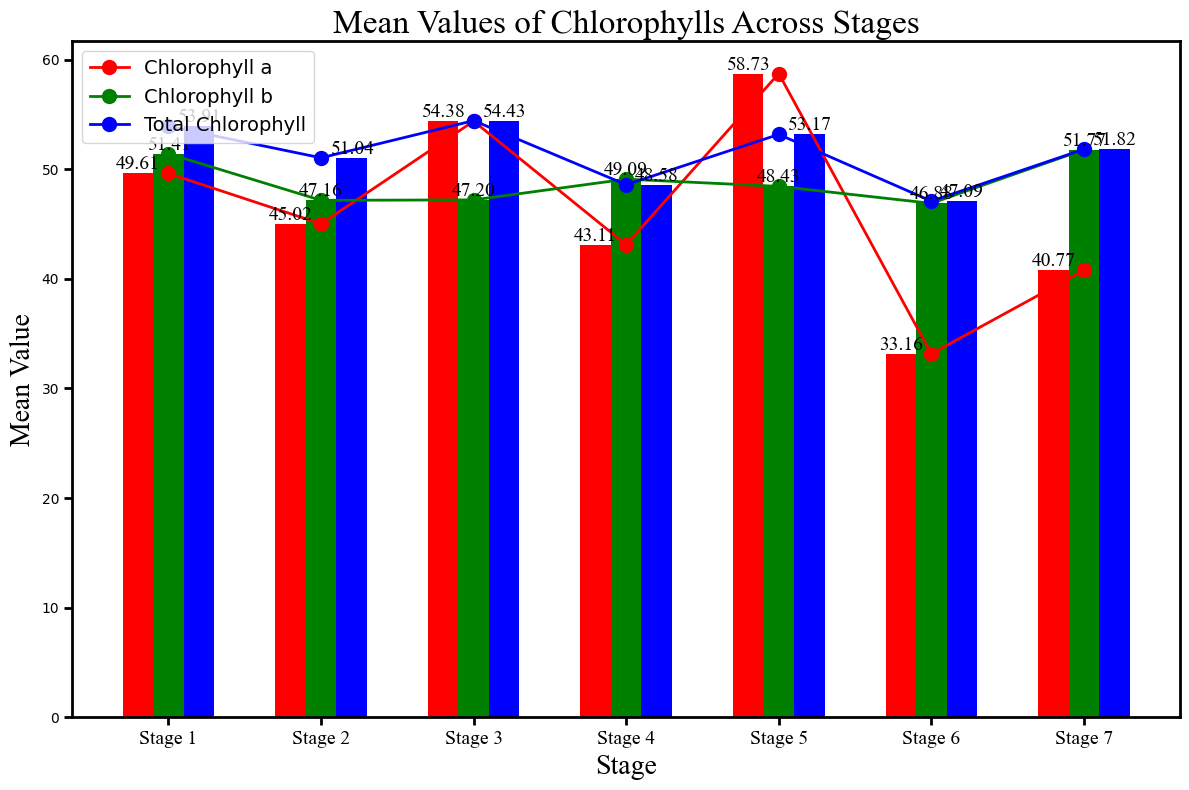

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 Y 矩阵是一个 140x3 的矩阵，每列分别代表叶绿素 a、叶绿素 b、叶绿素总量
num_stages = 7
samples_per_stage = 20


# 初始化存储每个阶段平均值的数组
stage_means = np.zeros((num_stages, 3))  # 7行（阶段数）x 3列（指标数）

# 计算每个阶段的平均值
for stage in range(num_stages):
    # 获取当前阶段的样本索引范围
    sample_start = stage * samples_per_stage
    sample_end = (stage + 1) * samples_per_stage
    
    # 提取当前阶段的样本数据
    stage_samples = Y[sample_start:sample_end, :]
    
    # 计算当前阶段的平均值（每列的平均值）
    stage_mean = np.mean(stage_samples, axis=0)  # 沿着第一维（行）计算平均值
    
    # 存储当前阶段的平均值
    stage_means[stage, :] = stage_mean

# 设置颜色
colors = ['r', 'g', 'b']

# 画出柱状图和折线图
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
bar_positions = np.arange(num_stages)

# 绘制柱状图
for i in range(3):
    ax.bar(bar_positions + i*bar_width - bar_width, stage_means[:, i], bar_width, color=colors[i], label=f'Chlorophyll {chr(97 + i)}')

# 绘制折线图
for i in range(3):
    ax.plot(bar_positions, stage_means[:, i], color=colors[i], marker='o', markersize=10, linewidth=2)

# 添加图例和标签
ax.legend(['Chlorophyll a', 'Chlorophyll b', 'Total Chlorophyll'], fontsize=14, loc='upper left')
ax.set_xlabel('Stage', fontsize=20, fontname='Times New Roman')
ax.set_ylabel('Mean Value', fontsize=20, fontname='Times New Roman')
ax.set_title('Mean Values of Chlorophylls Across Stages', fontsize=24, fontname='Times New Roman')
ax.set_xticks(bar_positions)
ax.set_xticklabels([f'Stage {i+1}' for i in range(num_stages)], fontsize=14, fontname='Times New Roman')

# 设置坐标轴的粗细
ax.tick_params(axis='x', width=2, length=6)
ax.tick_params(axis='y', width=2, length=6)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# 显示数据标签
for i in range(num_stages):
    for j in range(3):
        bar_center = bar_positions[i] + j*bar_width - bar_width
        ax.text(bar_center, stage_means[i, j], f'{stage_means[i, j]:.2f}', ha='center', va='bottom', fontsize=14, fontname='Times New Roman')

plt.tight_layout()
plt.show()
